#### Random walk on networks

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import networkx as nx
import seaborn as sns
import math


In [37]:

n = 200
m = 5
N = 10000
k = 6
pws = 0.3
p_er = 0.05

G1 = nx.erdos_renyi_graph(n, p_er, seed=420)
G2 = nx.watts_strogatz_graph(n, k, pws)
G3 = nx.barabasi_albert_graph(n, m)



def graph_gen(G):
    A = nx.to_numpy_array(G)

    deg = {node:val for (node, val) in G.degree()}
    deg_list = list(deg.values())

    triangles = nx.triangles(G)
    tri = list(triangles.values())

    cc_list = np.zeros(len(list(G.nodes())))
    for i in range(1, len(list(G.nodes()))):
        if math.comb(deg_list[i], 2) > 0:
            cc_list[i] = tri[i]/math.comb(deg_list[i], 2)
        else:
            cc_list[i] = 0
    
    return A, deg_list, cc_list


A1, deg_list1, cc_list1 = graph_gen(G1)
A2, deg_list2, cc_list2 = graph_gen(G2)
A3, deg_list3, cc_list3 = graph_gen(G3)   


In [277]:
#Initial condition: same number of agents on all nodes

import random
N_list = np.zeros(n)
N_list = np.array([i+N/n for i in N_list])
N_list_rand = np.array([random.randint(1, 10) for i in N_list])
ini_N = N_list
ini_N

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50

In [9]:
'''
Random walk modeling
'''

def determ_random_walk(t_step, G, A, deg_list, N_list, p): 
    timestep = np.linspace(1, t_step, t_step)
    all_N_list = [N_list]
    for t in timestep:
        new_N_list = np.zeros(len(list(G.nodes())))
        for i in G.nodes():
            sum_Nj = 0
            for j in G.nodes():
                k_j = deg_list[j]
                if A[i][j] > 0:
                    sum_Nj +=  N_list[j]*p/k_j
            new_N_list[i] = (1-p)*N_list[i] + sum_Nj
        
        N_list = new_N_list
            
        all_N_list.append(new_N_list)
        N_mean = np.mean(all_N_list, axis=0)
    return all_N_list, N_mean





In [86]:
n = len(G1.nodes())
uniq_deg_list = pd.DataFrame(deg_list1).drop_duplicates().values.flatten()

#all nodes of have same number of agents/walkers
deg_arr = np.array(deg_list1)
Wk_list = []
# print(deg_list1)
for deg in uniq_deg_list:
#     print(deg)
    deg_node = np.array(np.where(deg_arr == deg)).flatten()
#     print(deg_node)
    Wk_list.append(sum(N_list_rand[deg_node])/len(deg_node))
Wk_list = np.array(Wk_list)



In [167]:
deg_arr = np.array(deg_list1)
a = np.where(deg_arr == k)[0]
for e in a:
    print(e)

11
15
35
138
149
169
178


In [127]:
pd.DataFrame(deg_list1).drop_duplicates().values.flatten()

for deg in deg_list1:
        N_avg = np.mean(np.where(deg_arr == deg))
        N_list.append(N_avg)

L = len(G1.edges)

deg = []
freq = []
deg_freq = dict(zip(deg, freq))
deg_pd.DataFrame.from_dict(deg_freq, orient = 'index', columns = ['count']).reset_index()
deg_freq

{}

In [309]:
np.unique(np.array(deg_list1))

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 19])

In [334]:

def degree_determ_random_walk(t_step, G, N, ini_N, p): 
    
    A, deg_list, cc_list = graph_gen(G)
    L = len(G.edges)
    nodes_arr = np.array(G.nodes())
    uniq_deg_list = np.unique(np.array(deg_list))
    
    def p_kp(k):
        deg_arr = np.array(deg_list)
        return len(nodes_arr[np.where(deg_arr == k)])*k/(2*L)
    
    def W_k(k, d_l, N_l):
        deg_arr = np.array(d_l)
        return np.mean(N_l[np.where(deg_arr == k)])
    
    Wk_list = []
    for deg in uniq_deg_list:
        Wk_list.append(W_k(deg, deg_list, ini_N))    
    print(Wk_list)
    
    ### random walk ### 
    
    timestep = np.linspace(1, t_step, t_step)
    avg_k = np.mean(deg_list)    
    all_Wk_list = [Wk_list]
    for t in timestep:
        new_Wk_list = []
        for ik in range(len(uniq_deg_list)):
            k = uniq_deg_list[ik]
            
            sum_Wk = 0
            for ikp in range(len(uniq_deg_list)):
                k_p = uniq_deg_list[ikp]
                sum_Wk += p_kp(k_p)*Wk_list[ikp]
            if sum_Wk>8000:
                print(t, k, avg_k)
            new_Wk_list.append((1-p)*Wk_list[ik] + (k*p/avg_k)*sum_Wk)
            
            
        Wk_list = new_Wk_list
#         print(sum(Wk_list))
        all_Wk_list.append(new_Wk_list)
    
    return uniq_deg_list, all_Wk_list



[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
100.0 1 9.97
100.0 3 9.97
100.0 4 9.97
100.0 5 9.97
100.0 6 9.97
100.0 7 9.97
100.0 8 9.97
100.0 9 9.97
100.0 10 9.97
100.0 11 9.97
100.0 12 9.97
100.0 13 9.97
100.0 14 9.97
100.0 15 9.97
100.0 16 9.97
100.0 19 9.97
101.0 1 9.97
101.0 3 9.97
101.0 4 9.97
101.0 5 9.97
101.0 6 9.97
101.0 7 9.97
101.0 8 9.97
101.0 9 9.97
101.0 10 9.97
101.0 11 9.97
101.0 12 9.97
101.0 13 9.97
101.0 14 9.97
101.0 15 9.97
101.0 16 9.97
101.0 19 9.97
102.0 1 9.97
102.0 3 9.97
102.0 4 9.97
102.0 5 9.97
102.0 6 9.97
102.0 7 9.97
102.0 8 9.97
102.0 9 9.97
102.0 10 9.97
102.0 11 9.97
102.0 12 9.97
102.0 13 9.97
102.0 14 9.97
102.0 15 9.97
102.0 16 9.97
102.0 19 9.97
103.0 1 9.97
103.0 3 9.97
103.0 4 9.97
103.0 5 9.97
103.0 6 9.97
103.0 7 9.97
103.0 8 9.97
103.0 9 9.97
103.0 10 9.97
103.0 11 9.97
103.0 12 9.97
103.0 13 9.97
103.0 14 9.97
103.0 15 9.97
103.0 16 9.97
103.0 19 9.97
104.0 1 9.97
104.0 3 9.97
104.0 4 9.97


Text(0, 0.5, '$N(i)$')

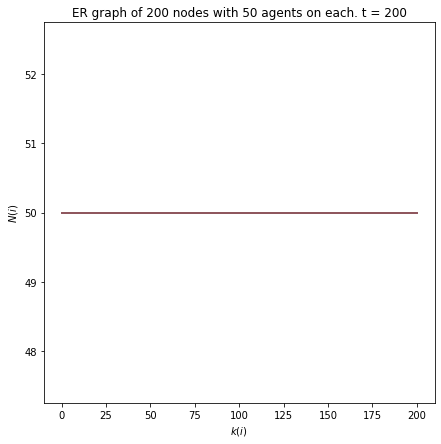

In [335]:
N_list = np.zeros(n)
N_list = np.array([i+N/n for i in N_list])
N_list_rand = np.array([random.randint(1, 10) for i in N_list])


deg_list1, Wk_list1 = degree_determ_random_walk(200, G1, N, N_list, 0.7)
# deg_list2, Wk_list2 = degree_determ_random_walk(200, G2, N, N_list, 0.7)
# deg_list3, Wk_list3 = degree_determ_random_walk(200, G3, N, N_list, 0.7)


plt.figure(figsize = (7, 7))
for idx in range(len(deg_list1)):
    y =[]
    
    for list_ in N_list1:
        y.append(list_[idx])
    plt.plot(y)
plt.title("ER graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("$k(i)$")
plt.ylabel("$N(i)$")


# plt.figure(figsize = (7, 7))
# for idx in range(len(deg_list2)):
#     y =[]
    
#     for list_ in N_list2:
#         y.append(list_[idx])
#     plt.plot(y)
# plt.title("Watts-Strogatz graph of 200 nodes with 50 agents on each. t = 200")
# plt.xlabel("$k(i)$")
# plt.ylabel("$N(i)$")



# plt.figure(figsize = (7, 7))
# for idx in range(len(deg_list3)):
#     y =[]
    
#     for list_ in N_list3:
#         y.append(list_[idx])
#     plt.plot(y)
# plt.title("BA graph of 200 nodes with 50 agents on each. t = 200")
# plt.xlabel("$k(i)$")
# plt.ylabel("$N(i)$")



Text(0.5, 1.0, 'BA graph clustering coefficient vs average agent count')

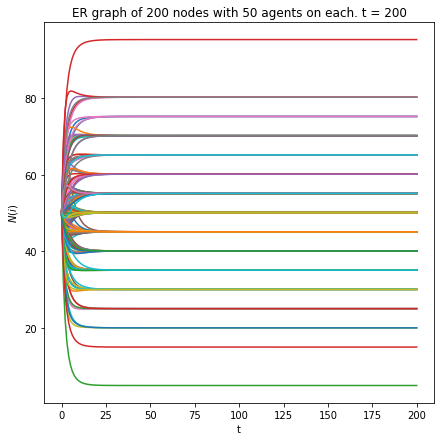

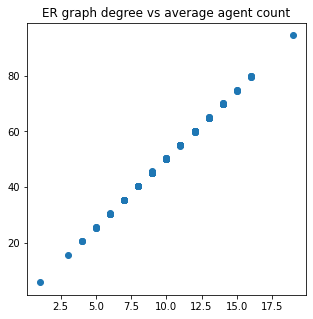

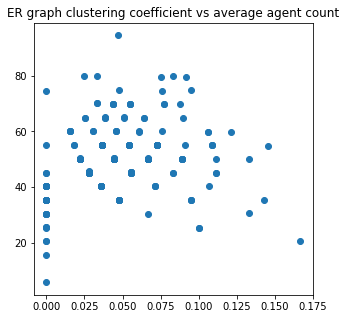

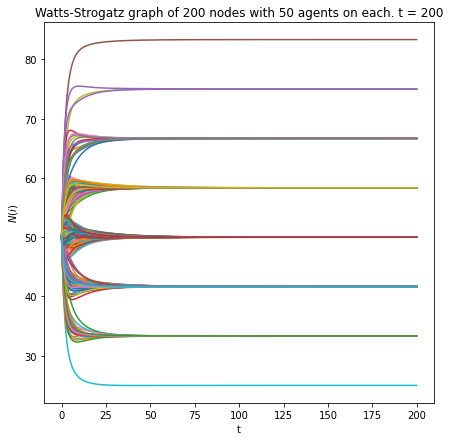

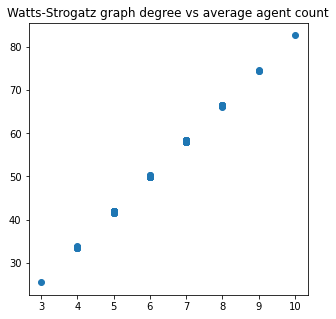

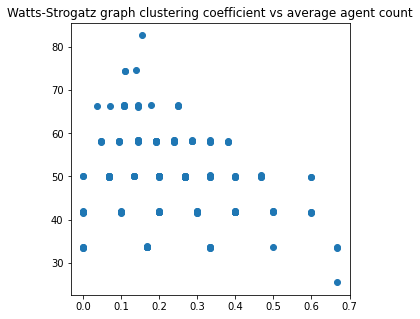

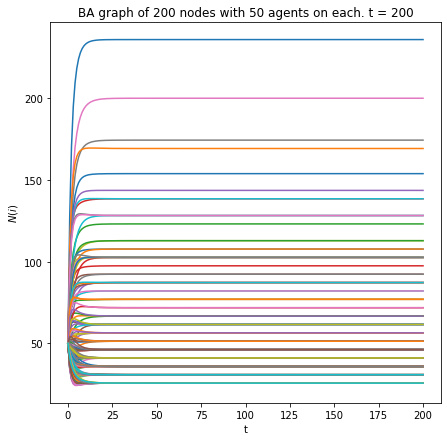

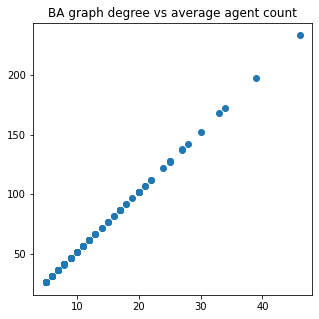

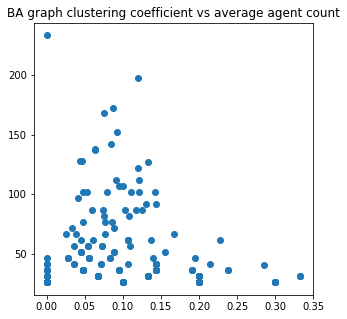

In [7]:
N_list1, N_mean1 = determ_random_walk(200, G1, A1, deg_list1, N_list, 0.4)
N_list2, N_mean2 = determ_random_walk(200, G2, A2, deg_list2, N_list, 0.4)
N_list3, N_mean3 = determ_random_walk(200, G3, A3, deg_list3, N_list, 0.4)

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in N_list1:
        y.append(list_[idx])
    plt.plot(y)
plt.title("ER graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list1, N_mean1)
plt.title("ER graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list1, N_mean1)
plt.title("ER graph clustering coefficient vs average agent count")

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in N_list2:
        y.append(list_[idx])
    plt.plot(y)
plt.title("Watts-Strogatz graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list2, N_mean2)
plt.title("Watts-Strogatz graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list2, N_mean2)
plt.title("Watts-Strogatz graph clustering coefficient vs average agent count")

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in N_list3:
        y.append(list_[idx])
    plt.plot(y)
plt.title("BA graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list3, N_mean3)
plt.title("BA graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list3, N_mean3)
plt.title("BA graph clustering coefficient vs average agent count")

Text(0.5, 1.0, 'BA graph clustering coefficient vs average agent count')

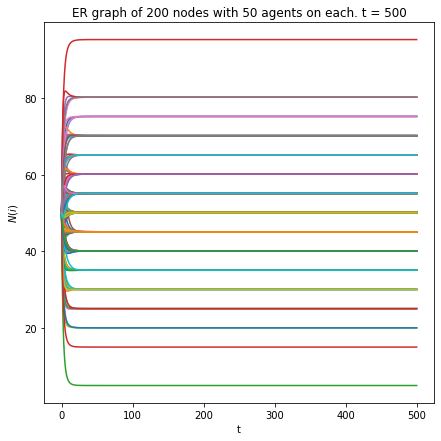

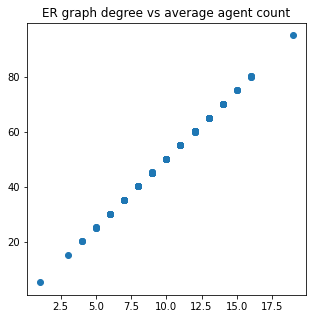

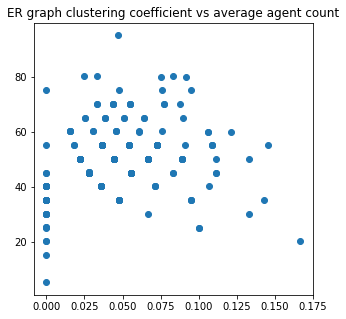

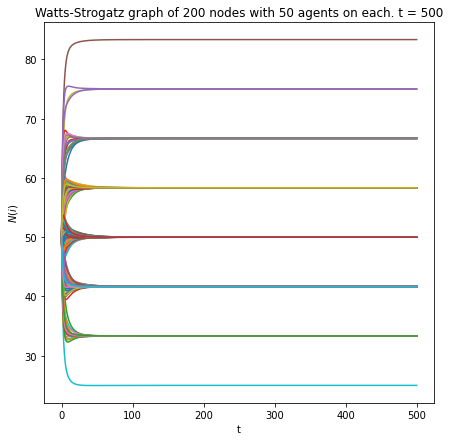

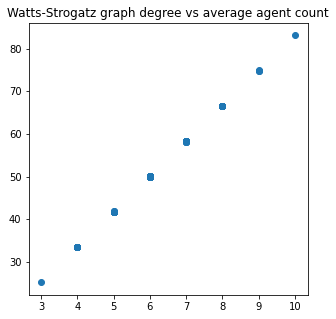

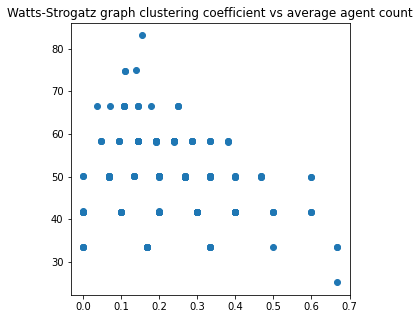

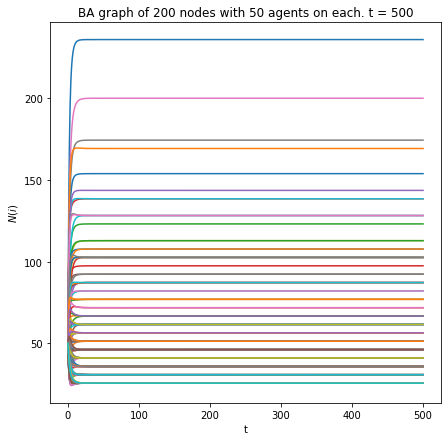

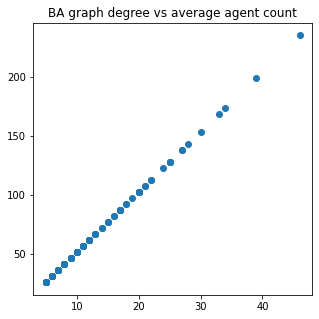

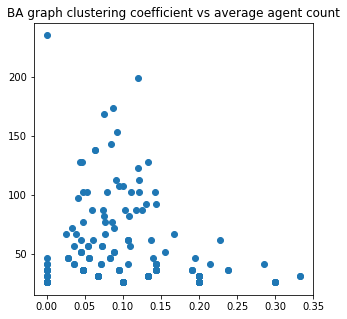

In [9]:
N_list1, N_mean1 = determ_random_walk(500, G1, A1, deg_list1, N_list, 0.4)
N_list2, N_mean2 = determ_random_walk(500, G2, A2, deg_list2, N_list, 0.4)
N_list3, N_mean3 = determ_random_walk(500, G3, A3, deg_list3, N_list, 0.4)

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in N_list1:
        y.append(list_[idx])
    plt.plot(y)
plt.title("ER graph of 200 nodes with 50 agents on each. t = 500")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list1, N_mean1)
plt.title("ER graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list1, N_mean1)
plt.title("ER graph clustering coefficient vs average agent count")

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in N_list2:
        y.append(list_[idx])
    plt.plot(y)
plt.title("Watts-Strogatz graph of 200 nodes with 50 agents on each. t = 500")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list2, N_mean2)
plt.title("Watts-Strogatz graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list2, N_mean2)
plt.title("Watts-Strogatz graph clustering coefficient vs average agent count")

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    for list_ in N_list3:
        y.append(list_[idx])
    plt.plot(y)
    
plt.title("BA graph of 200 nodes with 50 agents on each. t = 500")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list3, N_mean3)
plt.title("BA graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list3, N_mean3)
plt.title("BA graph clustering coefficient vs average agent count")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

Text(0, 0.5, 'Average agent count')

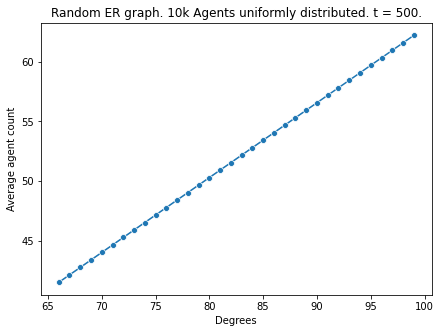

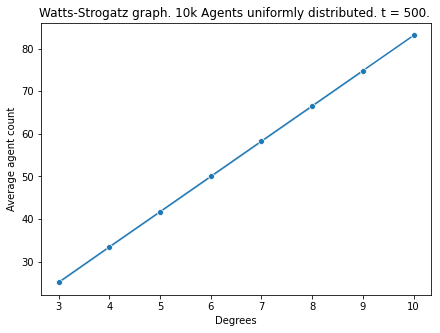

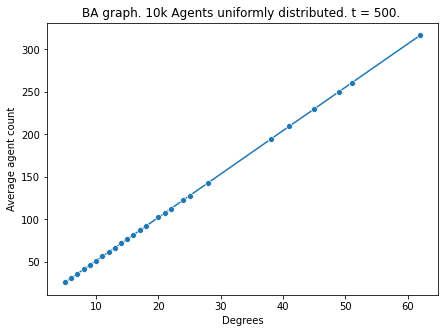

In [180]:


plt.figure(figsize = (7, 5))
sns.lineplot(deg_list1, N_mean1, marker = 'o')
plt.title("Random ER graph. 10k Agents uniformly distributed. t = 500.")
plt.xlabel("Degrees")
plt.ylabel("Average agent count")

plt.figure(figsize = (7, 5))
sns.lineplot(deg_list2, N_mean2, marker = 'o')
plt.title("Watts-Strogatz graph. 10k Agents uniformly distributed. t = 500. ")
plt.xlabel("Degrees")
plt.ylabel("Average agent count")
             
plt.figure(figsize = (7, 5))
sns.lineplot(deg_list3, N_mean3, marker = 'o')
plt.title("BA graph. 10k Agents uniformly distributed. t = 500. ")
plt.xlabel("Degrees")
plt.ylabel("Average agent count")
             

In [229]:
'''
Stochastic Random walk modeling
'''



def stoch_random_walk(t_step, G, A, deg_list, N_list, p): 
    timestep = np.linspace(1, t_step, t_step)
    all_N_list = [N_list]

    for t in timestep:
        new_N_list = np.zeros(len(list(G.nodes())))
        for i in G.nodes():
            k = deg_list[i]
            p_vals = [1-p] + [p/k]*k
            w_list = np.random.multinomial(N_list[i], p_vals)
            ind = 0
#             print(k)
#             print(len(list(G.neighbors(i))))
            for j in G.neighbors(i):
                ind += 1
                new_N_list[j] += w_list[ind]
            new_N_list[i] += w_list[0] 
            
        N_list = new_N_list.copy()
        all_N_list.append(new_N_list)
        N_mean = np.mean(all_N_list, axis=0)
    return all_N_list, N_mean
                      



In [232]:
s_N_list3, s_N_mean3 = stoch_random_walk(200, G3, A3, deg_list3, N_list, 1)

Text(0, 0.5, '$N(i)$')

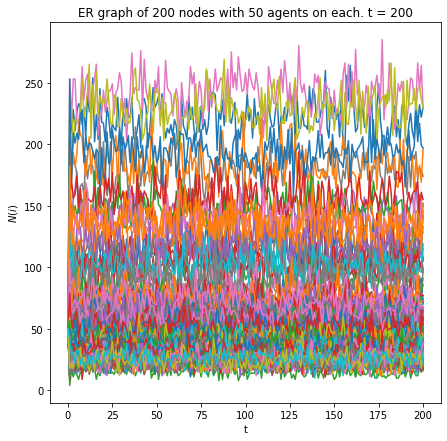

In [233]:
plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in s_N_list3:
        y.append(list_[idx])
    plt.plot(y)
    
plt.title("ER graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

Text(0.5, 1.0, 'BA graph clustering coefficient vs average agent count')

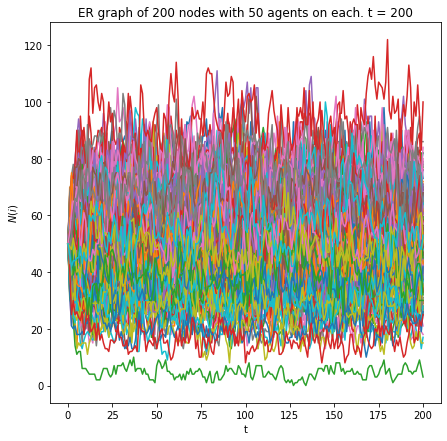

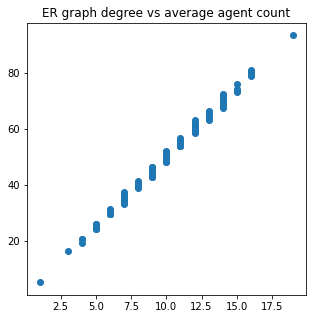

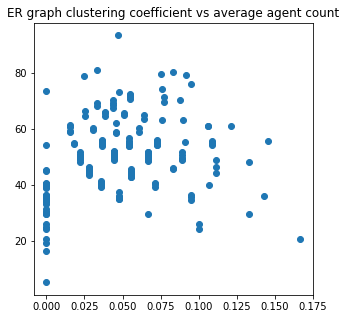

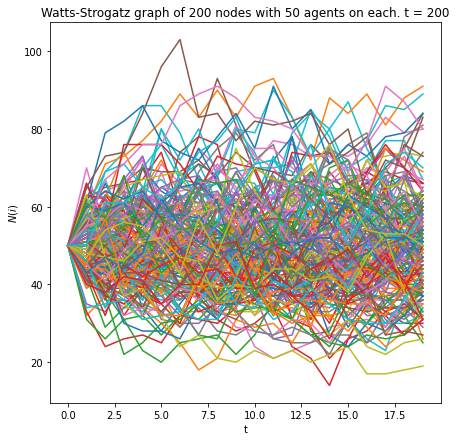

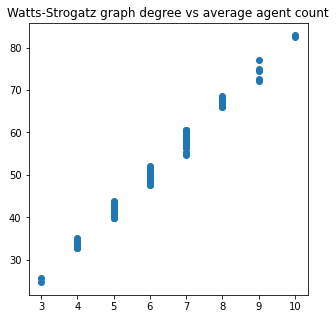

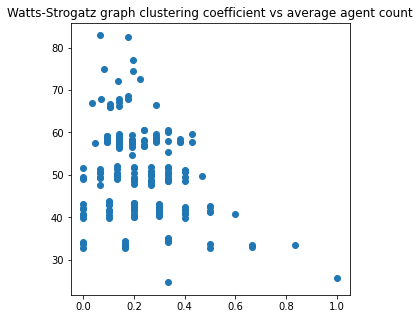

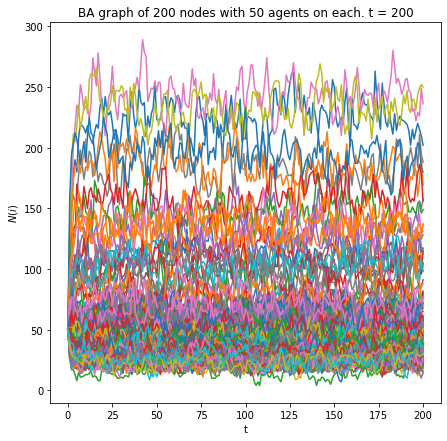

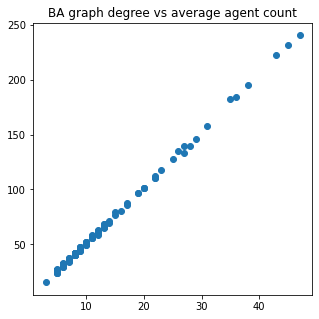

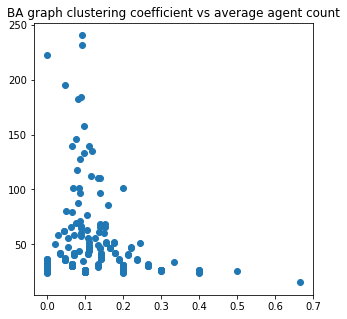

In [228]:
s_N_list1, s_N_mean1 = stoch_random_walk(200, G1, A1, deg_list1, N_list)
s_N_list2, s_N_mean2 = stoch_random_walk(200, G2, A2, deg_list2, N_list)
s_N_list3, s_N_mean3 = stoch_random_walk(200, G3, A3, deg_list3, N_list)

plt.figure(figsize = (7, 7))
for idx in range(200):
    y =[]
    
    for list_ in s_N_list1:
        y.append(list_[idx])
    plt.plot(y)
plt.title("ER graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list1, s_N_mean1)
plt.title("ER graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list1, s_N_mean1)
plt.title("ER graph clustering coefficient vs average agent count")

plt.figure(figsize = (10, 7))
for idx in range(200):
    y =[]
    for list_ in s_N_list2:
        y.append(list_[idx])
    plt.plot(y[0:20])
plt.title("Watts-Strogatz graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list2, s_N_mean2)
plt.title("Watts-Strogatz graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list2, s_N_mean2)
plt.title("Watts-Strogatz graph clustering coefficient vs average agent count")

plt.figure(figsize = (10, 7))
for idx in range(200):
    y =[]
    
    for list_ in s_N_list3:
        y.append(list_[idx])
    plt.plot(y)
plt.title("BA graph of 200 nodes with 50 agents on each. t = 200")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list3, s_N_mean3)
plt.title("BA graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list3, s_N_mean3)
plt.title("BA graph clustering coefficient vs average agent count")

In [1]:
import random
randomlist = []
for i in range(0,20):
    ni = random.randint(1,n)
    randomlist.append(ni)


s_N_list1, s_N_mean1 = stoch_random_walk(2000, G1, A1, deg_list1, N_list, 0.05)
s_N_list2, s_N_mean2 = stoch_random_walk(2000, G2, A2, deg_list2, N_list, 0.05)
s_N_list3, s_N_mean3 = stoch_random_walk(2000, G3, A3, deg_list3, N_list, 0.05)

plt.figure(figsize = (10, 7))
for idx in randomlist:
    y =[]
    
    for list_ in s_N_list1:
        y.append(list_[idx])
    plt.plot(y)
plt.title("ER graph of 200 nodes with 50 agents on each. t = 2000")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list1, s_N_mean1)
plt.title("ER graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list1, s_N_mean1)
plt.title("ER graph clustering coefficient vs average agent count")

plt.figure(figsize = (10, 7))
for idx in randomlist:
    y =[]
    for list_ in s_N_list2:
        y.append(list_[idx])
    plt.plot(y[0:20])
plt.title("Watts-Strogatz graph of 200 nodes with 50 agents on each. t = 2000")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list2, s_N_mean2)
plt.title("Watts-Strogatz graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list2, s_N_mean2)
plt.title("Watts-Strogatz graph clustering coefficient vs average agent count")

plt.figure(figsize = (10, 7))
for idx in randomlist:
    y =[]
    
    for list_ in s_N_list3:
        y.append(list_[idx])
    plt.plot(y)
plt.title("BA graph of 200 nodes with 50 agents on each. t = 2000")
plt.xlabel("t")
plt.ylabel("$N(i)$")

plt.figure(figsize = (5, 5))
plt.scatter(deg_list3, s_N_mean3)
plt.title("BA graph degree vs average agent count")
plt.figure(figsize = (5, 5))
plt.scatter(cc_list3, s_N_mean3)
plt.title("BA graph clustering coefficient vs average agent count")

NameError: name 'n' is not defined

In [ ]:

N_list1[-20:]